In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import networkx as nx

## Dataframe tricks

In [18]:
# Iterate all the rows of the dataframe

d = {'col1': [1, 2], 'col2': [3, 4], 'col3': [5, 6]}
df = pd.DataFrame(data=d)

# Display the DataFrame
display(df)

# Iterate over the DataFrame rows
for index, row in df.iterrows():
    # Access the 'col1' value for each row
    print(row['col1'])

,col1,col2,col3
0,1,3,5
1,2,4,6


1
2


In [19]:
# keep only some of the columns
col1_col3_df = df[['col1','col3']]
display(col1_col3_df)

,col1,col3
0,1,5
1,2,6


## Import data

`pd.read_csv()`

In [20]:
df = pd.read_csv('example_df.tsv.gz', sep="\t", compression='gzip')
df['random_values_2'] = np.random.rand(len(df))
display(df.head(2))

,name,topic,content,random_values_2
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,People,copyright aedan mac gabrain schools wikipedia ...,0.399552
1,%C3%85land,Geography,copyright aland schools wikipedia selection re...,0.005188


In [21]:
columns = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', \
          'outcome_type']
adoption_df = pd.read_csv('aac_intakes_outcomes.csv', usecols=columns)
display(adoption_df.sample(2))

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
68304,Adoption,Spayed Female,2.0,Dog,Normal,Stray,Intact Female,2.0,2017,1.0,9.956250
8004,Euthanasia,Intact Female,1.0,Dog,Normal,Public Assist,Intact Female,1.0,2014,1.0,13.839583


## Dataframe methods

`.sample(number_of_samples, replace=True/False)`

## Serie methods

`.value_counts()`

In [22]:
value_counts = df['topic'].value_counts()
display(value_counts.head(2))

Science      1105
Geography    1058
Name: topic, dtype: int64

`.isin(list_var)`

`.to_numpy()`

`.mean()`

## Groupby methods

`.count()`

In [23]:
count = df.groupby('topic').count()
display(count.head(2))

,name,content,random_values_2
topic,,,
Art,33,33,33
Business_Studies,76,76,76


## Descriptive statistics

In [24]:
df['random_values'] = np.random.rand(len(df))
df['random_values'] = np.random.normal(0, 1, len(df))
df['random_values'].describe()

count    4598.000000
mean       -0.011326
std         0.986900
min        -3.455807
25%        -0.669368
50%        -0.021999
75%         0.654788
max         3.361846
Name: random_values, dtype: float64

## Correlation

In [25]:
from scipy import stats
test1 = stats.pearsonr(df['random_values'],df['random_values'])
test2 = stats.spearmanr(df['random_values'],df['random_values'])
print(f"test1 = {test1}")
print(f"test2 = {test2}")

test1 = PearsonRResult(statistic=0.9999999999999998, pvalue=0.0)
test2 = SignificanceResult(statistic=1.0, pvalue=0.0)


## Hypothesis testing

In [26]:
# t-test
stats.ttest_ind(df['random_values'], df['random_values'])

TtestResult(statistic=0.0, pvalue=1.0, df=9194.0)

In [27]:
# does the data comes frome a normal distribution?
from statsmodels.stats import diagnostic
ksstat, pvalue = diagnostic.kstest_normal(df['random_values'], dist='norm') # dist='exp' for exponential
print(f"P-value is {pvalue}. Therefore we can not reject the null hypothesis that the data comes from a normal distribution")

P-value is 0.9517780369539678. Therefore we can not reject the null hypothesis that the data comes from a normal distribution


In [28]:
# one-sided binomial test
from statsmodels.stats import proportion
pvalue = proportion.binom_test(28, 100, 0.2, alternative='larger')
# treatment succes : given 28 out of 100 samples are one/high/true
# return the p-value of the null hypothese that the probability of a successful treatement is the same as a fration of 0.2 (20%).
# Looks whether the probability is larger.

## Linear regression

In [29]:
display(df.head())

,name,topic,content,random_values_2,random_values
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,People,copyright aedan mac gabrain schools wikipedia ...,0.399552,0.650041
1,%C3%85land,Geography,copyright aland schools wikipedia selection re...,0.005188,-1.023600
2,%C3%89douard_Manet,People,copyright edouard manet schools wikipedia sele...,0.533665,1.137823
3,%C3%89ire,Geography,copyright eire schools wikipedia selection rel...,0.639230,1.078800
4,%C3%93engus_I_of_the_Picts,People,copyright oengus picts schools wikipedia selec...,0.440958,0.467555


In [30]:
# create the linear regression model
import statsmodels.formula.api as smf
mod = smf.ols(formula='random_values ~ random_values + random_values_2', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          random_values   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.912e+33
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:04:26   Log-Likelihood:             1.5289e+05
No. Observations:                4598   AIC:                        -3.058e+05
Df Residuals:                    4595   BIC:                        -3.058e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.551e-17   2.58e-17     

## Logistic regression

In [31]:
# add a column with binary random values
df['random_binary'] = 0
random_index = np.random.randint(0, df.shape[0])
df.at[random_index, 'random_binary'] = 1

In [32]:
# can standardize the continous variables, example
df['random_normalized'] = (df['random_values'] - df['random_values'].mean())/df['random_values'].std()

In [33]:
mod = smf.logit(formula='random_binary ~ random_values + random_values_2', data=df)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.001236
         Iterations 20
                           Logit Regression Results                           
Dep. Variable:          random_binary   No. Observations:                 4598
Model:                          Logit   Df Residuals:                     4595
Method:                           MLE   Df Model:                            2
Date:                Tue, 16 Jan 2024   Pseudo R-squ.:                  0.3974
Time:                        18:04:27   Log-Likelihood:                -5.6842
converged:                       True   LL-Null:                       -9.4333
Covariance Type:            nonrobust   LLR p-value:                   0.02354
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.9789      1.791     -2.780      0.005      -8.489      -1.469
random_values

## Plots from dataframes or series

`.hist()`

<AxesSubplot: >

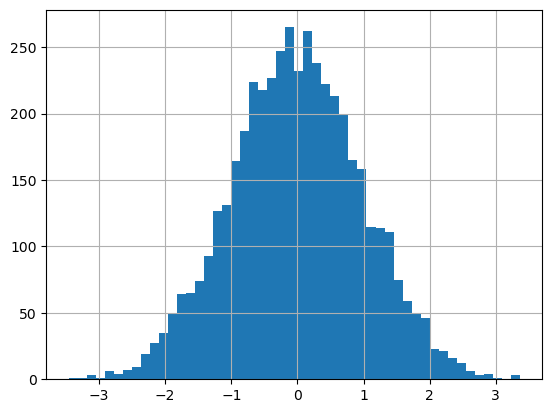

In [34]:
df['random_values'].hist(bins = 50)

`.plot()`

<AxesSubplot: >

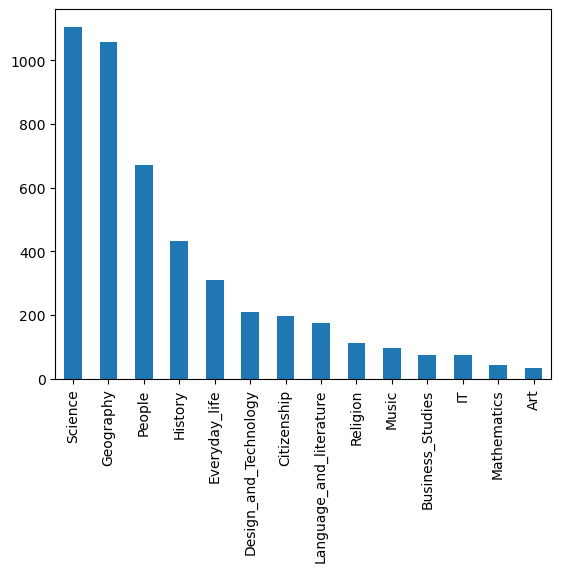

In [35]:
value_counts.plot(kind='bar')

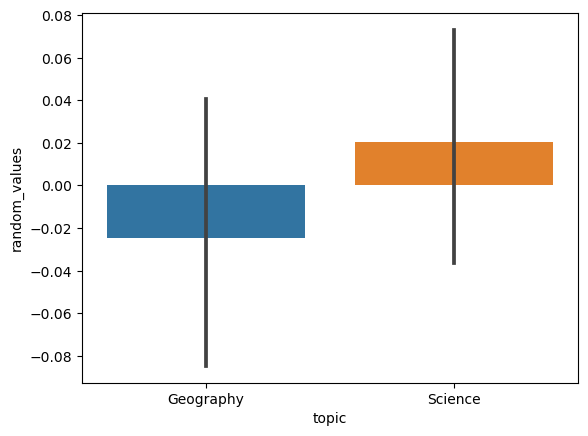

In [36]:
# barplot with uncertainty
import seaborn as sns
ax = sns.barplot(x="topic", y="random_values", data=df.loc[df['topic'].isin(['Science','Geography'])])

,name,topic,content,random_values_2,random_values,random_binary,random_normalized
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,People,copyright aedan mac gabrain schools wikipedia ...,0.399552,0.650041,0,0.670146
1,%C3%85land,Geography,copyright aland schools wikipedia selection re...,0.005188,-1.023600,0,-1.025711
2,%C3%89douard_Manet,People,copyright edouard manet schools wikipedia sele...,0.533665,1.137823,0,1.164402
3,%C3%89ire,Geography,copyright eire schools wikipedia selection rel...,0.639230,1.078800,0,1.104596
4,%C3%93engus_I_of_the_Picts,People,copyright oengus picts schools wikipedia selec...,0.440958,0.467555,0,0.485237


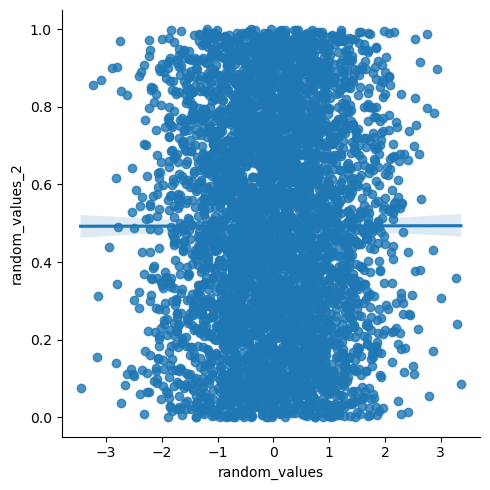

In [37]:
# useful plot for see the dependency of two variables
display(df.head())
sns.lmplot(x='random_values',y='random_values_2', data=df) # can precise the hue in order to separate the data into values of the hue column

## Ordinal encoding

In [38]:
factor = pd.factorize(df['topic'])
df['labels'] = factor[0] # add a new column containing the labels
definitions = factor[1] # the definitions of each labels

## TF-IDF

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(stop_words='english',smooth_idf=True)
vectorizer = TfidfVectorizer()
X = np.array(vectorizer.fit_transform(df['content']).todense())
terms = vectorizer.get_feature_names_out()

## Split Test and Train data

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['labels'].to_numpy(), test_size=0.3, random_state=42)

## Logistic regression classifier 1

In [41]:
def split_set(data_to_split, ratio=0.8):
    mask = np.random.rand(len(data_to_split)) < ratio
    return [data_to_split[mask].reset_index(drop=True), data_to_split[~mask].reset_index(drop=True)]

In [42]:
categorical_columns = ['sex_upon_outcome', 'animal_type', 'intake_condition',
                       'intake_type', 'sex_upon_intake']
train_categorical = pd.get_dummies(adoption_df, columns=categorical_columns)
display(train_categorical.sample(2))

,outcome_type,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
9186,Adoption,1.0,1.0,2014,1.0,8.329861,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
53793,Adoption,8.0,8.0,2016,3.0,30.831250,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


## Logistic regression classifier 2

In [43]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log_loss', max_iter=5, tol=None, alpha=1e-4, random_state=42)
clf.fit(X_train, y_train)

SGDClassifier(loss='log_loss', max_iter=5, random_state=42, tol=None)

In [44]:
# test the model with test fraction of the data
y_test_pred = clf.predict(X_test)

In [45]:
# compute accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Data:", accuracy)
print("Accuracy on Test Data: ", np.mean(y_test_pred == y_test))

Accuracy on Test Data: 0.7920289855072464
Accuracy on Test Data:  0.7920289855072464


In a 5-class classification a random model obtains an accuracy of 20% in expectation. Thus, obtaining an accuracy in high 80s is a strong outcome.

## Performance metric

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

# When the classes are not balanced (number of counts per class change a lot) uses confusion_matrix or balanced_accuracy_score

## Graphs

### Undirected graphs

In [ ]:
G = nx.Graph() # for a directed graph use nx.DiGraph()
edges = [(2,3), (1,3), (4,1), (4,5), (5,6), (5,7), (6,7), (7,8), (6,8)]
G.add_edges_from(edges)
print(G)

In [ ]:
# Helper function for plotting the degree distribution of a Graph
def plot_degree_distribution(G):
    degrees = {}
    for node in G.nodes():
        degree = G.degree(node)
        if degree not in degrees:
            degrees[degree] = 0
        degrees[degree] += 1
    sorted_degree = sorted(degrees.items())
    deg = [k for (k,v) in sorted_degree]
    cnt = [v for (k,v) in sorted_degree]
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title("Degree Distribution")
    plt.ylabel("Frequency")
    plt.xlabel("Degree")
    ax.set_xticks([d+0.05 for d in deg])
    ax.set_xticklabels(deg)

In [ ]:
# Helper function for printing various graph properties
def describe_graph(G):
    print(G)
    if nx.is_connected(G):
        print("Avg. Shortest Path Length: %.4f" %nx.average_shortest_path_length(G))
        print("Diameter: %.4f" %nx.diameter(G)) # Longest shortest path
    else:
        print("Graph is not connected")
        print("Diameter and Avg shortest path length are not defined!")
    print("Sparsity: %.4f" %nx.density(G))  # #edges/#edges-complete-graph
    # #closed-triplets(3*#triangles)/#all-triplets
    print("Global clustering coefficient aka Transitivity: %.4f" %nx.transitivity(G))

In [ ]:
# Helper function for visualizing the graph
def visualize_graph(G, with_labels=True, k=None, alpha=1.0, node_shape='o'):
    #nx.draw_spring(G, with_labels=with_labels, alpha = alpha)
    pos = nx.spring_layout(G, k=k)
    if with_labels:
        lab = nx.draw_networkx_labels(G, pos, labels=dict([(n, n) for n in G.nodes()]))
    ec = nx.draw_networkx_edges(G, pos, alpha=alpha)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color='g', node_shape=node_shape)
    # plt.axis('off')

In [ ]:
visualize_graph(G)
describe_graph(G)
plot_degree_distribution(G)

### Directed graphs

,source,target
0,1,2
1,1,3
2,3,2
3,4,3


Number of nodes = 4
Number of edges = 4
Average degree = 1.0


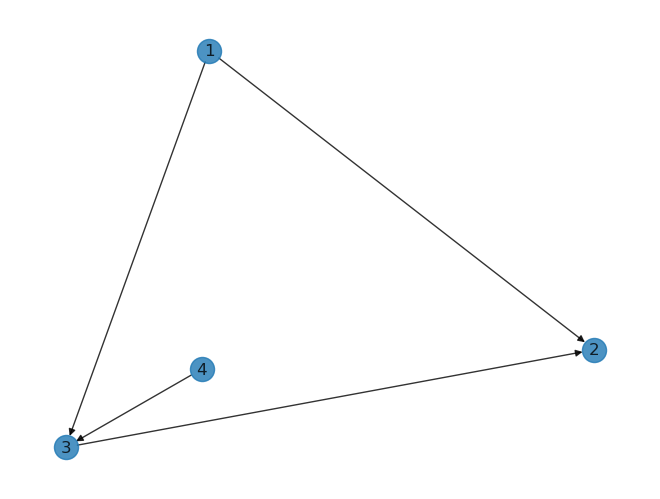

In [5]:
edges_data = {'source': [1, 1, 3, 4], 'target': [2, 3, 2, 3]}
edges_df = pd.DataFrame(data=edges_data)
display(edges_df)

edgeList = []; nodes = {}; edges = {}

for index, row in edges_df.iterrows():
    source = row['source']
    target = row['target']
    nodes[source] = True
    nodes[target] = True
    edges[(source, target)] = True
    edgeList.append((source, target))

G = nx.DiGraph()
G.add_edges_from(edgeList)
print(f"Number of nodes = {len(G.nodes())}")
print(f"Number of edges = {len(G.edges())}")
print(f"Average degree = {len(G.edges())/len(G.nodes())}")

nx.draw_spring(G, with_labels=True,  alpha = 0.8)

In [6]:
in_degree = G.in_degree()
print(f"in_degree = {in_degree}")
nodes = G.nodes()
print(f"nodes = {nodes}")

in_degree = [(1, 0), (2, 2), (3, 2), (4, 0)]
nodes = [1, 2, 3, 4]


In [8]:
in_degree = dict(G.in_degree())
print(in_degree)
print(f"in_degree.get(1,0) = {in_degree.get(4,0)}")
degseq=[in_degree.get(k,0) for k in nodes]
print(f"degseq = {degseq}")

dmax=max(degseq)+1
print(f"dmax = {dmax}")
freq= [ 0 for d in range(dmax) ]
print(f"freq = {freq}")
for d in degseq:
    freq[d] += 1
print(f"freq = {freq}")

{1: 0, 2: 2, 3: 2, 4: 0}
in_degree.get(1,0) = 0
degseq = [0, 2, 2, 0]
dmax = 3
freq = [0, 0, 0]
freq = [2, 0, 2]


In [ ]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

freq = degree_histogram_directed(G)
deg = range(len(freq))
fig, ax = plt.subplots()
plt.bar(deg, freq, width=0.80, color='b')
plt.title("Degree Distribution")
plt.ylabel("Frequency")
plt.xlabel("Degree")

In [ ]:
print("Weakly connected: ", nx.is_weakly_connected(G))
print(f"There are {len(list(nx.weakly_connected_components(G)))} weakly connected components")
print("Strongly connected: ", nx.is_strongly_connected(G))
print(f"There are {len(list(nx.strongly_connected_components(G)))} strongly connected components")

Average degree is not recommended as the degree distribution of real-world networks usually follows a powerlaw. Summarizing powerlaws with average values is not a good idea, as there is a long tail, and there are many nodes that have very high degree. Instead, median is a better choice.